In [23]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import math
from matplotlib import style
import inspect
from IPython.display import display, clear_output

style.use('ggplot')
style.use('seaborn-ticks')

`Golden_search().fit()` - расчет алгоритма (нужно запустить после создания экземпляра класса)  
`Golden_search().data` - таблица с пошаговыми расчетами  
`Golden_search().rep()` - ответ  
`Golden_search().vis()` - график функции с точкой минимума  
`Golden_search().vis_steps()` - пошаговая визуализация  

In [24]:
def f(x):
    return x**4 + 4*(x**3) + 7*(x**2) + 2*x + 1

In [25]:
class Golden_search:
    def __init__(self, f, a, b, e):
        raw_f = inspect.getsource(f)
        self.func = raw_f[raw_f.find('return') + 6:].strip()
        self.bounds = [a, b]
        self.e = e
        self.prec = 4
        
    def f(self, x):
        return f(x)

    def fit(self):
        f, a, b, e = self.f, self.bounds[0], self.bounds[1], self.e
        prec = self.prec
        
        T = (3 - math.sqrt(5)) / 2
        i = 0
        log_dict = {}
        x1 = a + T*(b-a)
        x2 = a + b - x1
        while 1:
            y1 = round(f(x1), prec)
            y2 = round(f(x2), prec)
            log_dict[i] = [a, b, x1, y1, x2, y2]
            i = i + 1
            if y1 <= y2:
                b = x2
                x2 = x1
                x1 = a + b - x2
            else:
                a = x1
                x1 = x2
                x2 = a + b - x1
            l = b-a
            if l <= e:
                x_opt = 0.5 * (a+b)
                log = pd.DataFrame(log_dict).T
                opt = [x_opt, f(x_opt)]
                log.columns = ['a', 'b', 'x1', 'y1', 'x2', 'y2']
                self.res = opt
                self.data = log
                break
                
    def rep(self):
        return print(f'Минимум функции f(x) = {self.func}, равный {round(self.res[1], self.prec)}  достигается при x = {round(self.res[0], self.prec)} с точностью e = {self.e} на шаге {len(self.data)}') 
                
    def vis(self):
        df, opt = self.data, self.res
        f, a, b = self.f, self.bounds[0], self.bounds[1]
        prec = self.prec
        plt_x = np.linspace(a, b, round((b-a)*250))
        plt_data = np.array([plt_x, [f(x) for x in plt_x]])
        fig, ax = plt.subplots(figsize = (16, 9))
        ax.plot(plt_data[0], plt_data[1], label = f'f(x) = {self.func}')
        ax.scatter(opt[0], opt[1], c ='red', label = f'f(x*) = {round(opt[1], prec)}')
        ax.legend( prop={'size': 14})
        ax.grid()
        return(ax)      
            
    
    def vis_steps(self):
        df, opt = self.data, self.res
        f, a, b = self.f, self.bounds[0], self.bounds[1]
        prec = self.prec
        
        plt_x = np.linspace(a, b, round((b-a)*250))
        plt_data = np.array([plt_x, [f(x) for x in plt_x]])
        fig, ax = plt.subplots(figsize = (16, 9))   
        
        for i in range(5):
            display(fig)
            ax.cla()
            clear_output(wait = True)
            plt.pause(0.5)
        
        for i in range(len(df)):
            if i % 7 == 0 and i != 0:
                a,b = x1 - a / 4 * x1, x2 + b / 4
            ax.set_xlim(a, b)
            
            x1 = df['x1'][i]
            y1 = df['y1'][i]
            
            x2 = df['x2'][i]
            y2 = df['y2'][i]
            
            ax.scatter(x1, y1, c = 'white', label = f'step = {i + 1}')
            
            ax.axvline(df['a'][i], c = 'blue', label = f'a = {round(df["a"][i], prec)}')
            ax.axvline(df['b'][i], c = 'orange', label = f'b = {round(df["b"][i], prec)}')
            
            ax.scatter(x1, y1, marker = 'x', c = 'black', label = f'f(x1) = {y1}')
            
            ax.plot(plt_data[0], plt_data[1])
            ax.scatter(x2, y2, marker = 'x', c = 'red', label = f'f(x2) = {y2}')
            
            if i == len(df) - 1:
                ax.scatter(opt[0], opt[1], c = 'red', marker = '|', label = f'f(x*) = {round(opt[1], prec)}')
                       
            ax.legend( prop={'size': 14})
            ax.grid()
            display(fig)
            
            ax.cla()

            clear_output(wait = True)
            plt.pause(0.5)
       

In [26]:
task1 = Golden_search(f, -3, 2, 0.001)
task1.fit()

In [27]:
task1.rep()

Минимум функции f(x) = x**4 + 4*(x**3) + 7*(x**2) + 2*x + 1, равный 0.8435  достигается при x = -0.1694 с точностью e = 0.001 на шаге 18


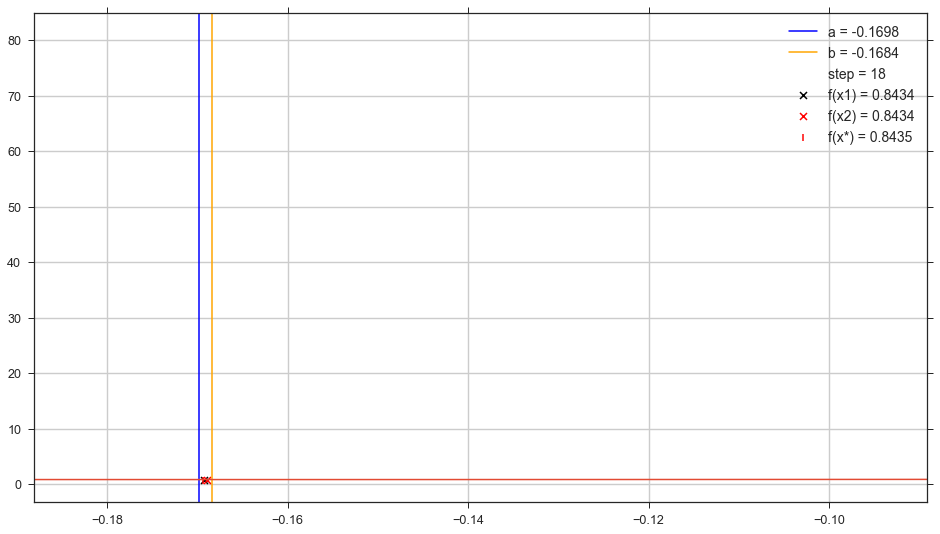

In [28]:
task1.vis_steps()

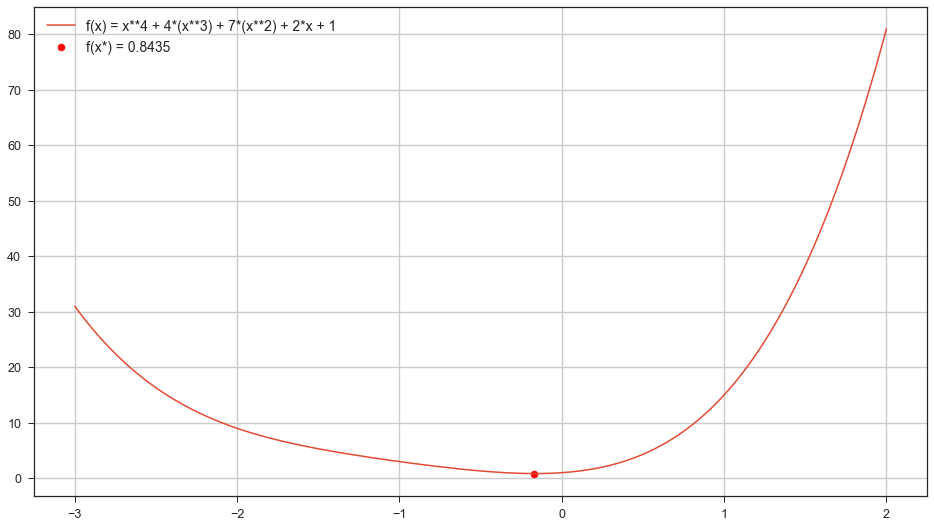

In [14]:
task1.vis();

In [15]:
task1.data

,a,b,x1,y1,x2,y2
0,-3.000000,2.000000,-1.090170,3.3689,0.090170,1.2403
1,-1.090170,2.000000,0.090170,1.2403,0.819660,9.9963
2,-1.090170,0.819660,-0.360680,1.0185,0.090170,1.2403
3,-1.090170,0.090170,-0.639320,1.7043,-0.360680,1.0185
4,-0.639320,0.090170,-0.360680,1.0185,-0.188471,0.8462
5,-0.360680,0.090170,-0.188471,0.8462,-0.082039,0.8809
6,-0.360680,-0.082039,-0.254249,0.8824,-0.188471,0.8462
7,-0.254249,-0.082039,-0.188471,0.8462,-0.147817,0.8449
8,-0.188471,-0.082039,-0.147817,0.8449,-0.122692,0.8528
9,-0.188471,-0.122692,-0.163346,0.8434,-0.147817,0.8449


In [16]:
def unimodality_search(f, x, d):
    f1, f2 = f(x), f(x + d)
    if f1 > f2:
        a = x
        x += d
        f1 = f2
    else:
        if f(x - d) >= f(x):
            return [x - d, x + d]
        b = x
        x = x - d
        f1 = f(x - d)
        d = - d
    k = 2
    x_k = x + (2 ** (k - 1)) * d
    f_k = f(x_k)
    while f(x) > f(x_k):
        if d > 0:
            a = x
        else:
            b = x
        k += 1
        x = x_k
        x_k = x + (2 ** (k - 1)) * d
    if d > 0:
        b = x_k
    else:
        a = x_k
    return [a, b]

In [17]:
unimodality_search(f, -10, 0.001)

[-5.905, 6.383]

In [18]:
str(0.00001)

'1e-05'